In [1]:
from numpy import genfromtxt
import numpy as np
from scipy.optimize import minimize
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from collections import OrderedDict
from datetime import datetime

In [ ]:
datos = pd.read_csv('Estadis.csv',delimiter=';')
datos['Panorama monetario y financiero (series mensuales) - Principales pasivos del BCRA, promedio mensual de saldos diarios en miles de pesos - Letras y Notas del BCRA - En pesos'] 

*RANKING DE LEBACS*
--------------------------------

Filtrar por horizonte

Vol. Operado + Alto => Mejor

% de Spread + Alto => Peor

Tasa Spot + Alta => Mejor

Tasa Forward + Alta => Peor

In [2]:
datos = pd.read_json('MERVtickers.json')

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3046 entries, 0 to 3045
Data columns (total 2 columns):
instruments    3046 non-null object
status         3046 non-null object
dtypes: object(2)
memory usage: 71.4+ KB


In [27]:
data = OrderedDict([(u'DICA', OrderedDict([(u'Price', 157.6922049909657), (u'Bolsar_Price', 3189.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 890), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 81.10754285161035), (u'TIR', 0.07035555800954392), (u'Unified TIR', 0.0712482648969579), (u'McCauley', 7.372371731510259), (u'Modified', 7.121841176496384), (u'Convexity', 70.14638782061924), (u'LETRA?', False), (u'Maturity', '31/12/2033'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'NDG21', OrderedDict([(u'Price', 19.95110024449878), (u'Bolsar_Price', 408.0), (u'Bond_slice', 1), (u'bond_min_operation', 1000), (u'selling_slices', 7950), (u'issuer', u'prov'), (u'Settlement_currency', u'USD_BN (20.450000)'), (u'VAN', 0.5692021131182239), (u'TIR', 0.12673263352280106), (u'Unified TIR', 0.12767236048987574), (u'McCauley', 0.27108098933684166), (u'Modified', 0.2627560478570984), (u'Convexity', 0.2996517662097544), (u'LETRA?', False), (u'Maturity', '11/10/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'LTDF9', OrderedDict([(u'Price', 97.41412475139619), (u'Bolsar_Price', 1970.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 1850), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 1.3736402393024747), (u'TIR', 0.03249893836710935), (u'Unified TIR', 0.03336007176024269), (u'McCauley', 0.8302533925014451), (u'Modified', 0.8041203352852699), (u'Convexity', 1.4256546834029535), (u'LETRA?', True), (u'Maturity', '08/02/2019'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'I19S8', OrderedDict([(u'Price', 901.0), (u'Bolsar_Price', 901.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 400000), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 92.53526256726605), (u'TIR', 0.27038002348643736), (u'Unified TIR', 0.059532963708454734), (u'McCauley', 0.44102763275344065), (u'Modified', 0.34716197090621925), (u'Convexity', 0.393970175960613), (u'LETRA?', True), (u'Maturity', '19/09/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'BD2C9', OrderedDict([(u'Price', 66.40586797066015), (u'Bolsar_Price', 1358.0), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 5000), (u'issuer', u'prov'), (u'Settlement_currency', u'USD_BN (20.450000)'), (u'VAN', 0.942282184365606), (u'TIR', 0.03069512682136684), (u'Unified TIR', 0.031554755784520605), (u'McCauley', 0.9280557417096114), (u'Modified', 0.9140276444768848), (u'Convexity', 1.9870253723453453), (u'LETRA?', False), (u'Maturity', '20/12/2019'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'CO26', OrderedDict([(u'Price', 105.91931736928458), (u'Bolsar_Price', 2142.0), (u'Bond_slice', 1), (u'bond_min_operation', 1000), (u'selling_slices', 6842), (u'issuer', u'prov'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 20.71446094753874), (u'TIR', 0.06138919825217235), (u'Unified TIR', 0.06227442694129004), (u'McCauley', 3.9092727955924724), (u'Modified', 3.850182885476562), (u'Convexity', 22.087356883934586), (u'LETRA?', False), (u'Maturity', '27/10/2026'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'A2E2', OrderedDict([(u'Price', 103.1007360947518), (u'Bolsar_Price', 2085.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 53000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 13.250323208062511), (u'TIR', 0.051302927449222616), (u'Unified TIR', 0.05217974390247471), (u'McCauley', 3.4658696333455064), (u'Modified', 3.3791885020661336), (u'Convexity', 14.758641097138357), (u'LETRA?', False), (u'Maturity', '26/01/2022'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'DICP', OrderedDict([(u'Price', 878.3), (u'Bolsar_Price', 878.3), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 980093), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 261.1794357786324), (u'TIR', 0.04670273439148936), (u'Unified TIR', 0.04670273439148936), (u'McCauley', 8.257076637558821), (u'Modified', 8.068662340468075), (u'Convexity', 86.41636392824745), (u'LETRA?', False), (u'Maturity', '31/12/2033'), (u'Caucion?', False), (u'is_cap_var', True), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', True), (u'bond_group', u'cer'), (u'nominal_divider', 100.0)])), (u'PMJ21', OrderedDict([(u'Price', 103.7), (u'Bolsar_Price', 103.7), (u'Bond_slice', 1), (u'bond_min_operation', 1000), (u'selling_slices', 0), (u'issuer', u'prov'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 77.33950915405912), (u'TIR', 0.29207995819988997), (u'Unified TIR', 0.07763132460374456), (u'McCauley', 2.1797386348157892), (u'Modified', 2.0314054314402634), (u'Convexity', 4.915038459180149), (u'LETRA?', False), (u'Maturity', '09/06/2021'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', True), (u'is_rate_badlar', True), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'A2M2', OrderedDict([(u'Price', 106.1), (u'Bolsar_Price', 106.1), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 499062), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 30.045774121756494), (u'TIR', 0.1836033948718504), (u'Unified TIR', -0.01284120527785615), (u'McCauley', 1.6168001922409907), (u'Modified', 1.592435478904224), (u'Convexity', 3.2388743364024046), (u'LETRA?', False), (u'Maturity', '06/03/2020'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'I15G8', OrderedDict([(u'Price', 921.715), (u'Bolsar_Price', 921.715), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 500000), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 73.23972121461384), (u'TIR', 0.2711928993168709), (u'Unified TIR', 0.060210925201727106), (u'McCauley', 0.3440546812398676), (u'Modified', 0.2706549740993361), (u'Convexity', 0.28625126562983005), (u'LETRA?', True), (u'Maturity', '15/08/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'TO23', OrderedDict([(u'Price', 104.0), (u'Bolsar_Price', 104.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 80.29271037788735), (u'TIR', 0.1784148209879108), (u'Unified TIR', -0.017168623029265362), (u'McCauley', 3.54509972670239), (u'Modified', 3.2547517511790414), (u'Convexity', 14.78308924325491), (u'LETRA?', False), (u'Maturity', '17/10/2023'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'DICY', OrderedDict([(u'Price', 158.23614172815624), (u'Bolsar_Price', 3200.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 26796), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 80.56360611441981), (u'TIR', 0.06985374244242883), (u'Unified TIR', 0.07074603080142983), (u'McCauley', 7.381230218071612), (u'Modified', 7.132127325442574), (u'Convexity', 70.33619134705064), (u'LETRA?', False), (u'Maturity', '31/12/2033'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'CUAP', OrderedDict([(u'Price', 625.0), (u'Bolsar_Price', 625.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 4000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 541.3390861786079), (u'TIR', 0.0555558449829794), (u'Unified TIR', 0.0555558449829794), (u'McCauley', 14.55551133588304), (u'Modified', 14.162117143553997), (u'Convexity', 270.8701332986873), (u'LETRA?', False), (u'Maturity', '31/12/2045'), (u'Caucion?', False), (u'is_cap_var', True), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', True), (u'bond_group', u'cer'), (u'nominal_divider', 100.0)])), (u'L2DJ8', OrderedDict([(u'Price', 99.09538375725785), (u'Bolsar_Price', 2004.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.5991533392108863), (u'TIR', 0.045217495414626066), (u'Unified TIR', 0.04608923644499674), (u'McCauley', 0.2083070406424921), (u'Modified', 0.19929540172866989), (u'Convexity', 0.23039728874159413), (u'LETRA?', True), (u'Maturity', '29/06/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AA19', OrderedDict([(u'Price', 105.82041978070448), (u'Bolsar_Price', 2140.0), (u'Bond_slice', 150000), (u'bond_min_operation', 150000), (u'selling_slices', 150000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 1.9914255669830823), (u'TIR', 0.03458633703863318), (u'Unified TIR', 0.03544921138145107), (u'McCauley', 0.9882006156792142), (u'Modified', 0.9714019972409262), (u'Convexity', 1.8694552477527786), (u'LETRA?', False), (u'Maturity', '22/04/2019'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'L2DL8', OrderedDict([(u'Price', 99.04593496296779), (u'Bolsar_Price', 2003.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 2500), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.5348020015126025), (u'TIR', 0.03455503297246111), (u'Unified TIR', 0.035417881206800006), (u'McCauley', 0.2860730193277651), (u'Modified', 0.27651793303428845), (u'Convexity', 0.3437543434253857), (u'LETRA?', True), (u'Maturity', '27/07/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'BDC28', OrderedDict([(u'Price', 105.4), (u'Bolsar_Price', 105.4), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 0), (u'issuer', u'prov'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 226.06253032961354), (u'TIR', 0.2852793115403122), (u'Unified TIR', 0.07195939244396343), (u'McCauley', 3.594993443168145), (u'Modified', 3.3556677936831627), (u'Convexity', 15.66029186223279), (u'LETRA?', False), (u'Maturity', '22/02/2028'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', True), (u'is_rate_badlar', True), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'AM20', OrderedDict([(u'Price', 107.0), (u'Bolsar_Price', 107.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 1000000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 41.22463626069522), (u'TIR', 0.2534223974608697), (u'Unified TIR', 0.04538982273633829), (u'McCauley', 1.5232700365695024), (u'Modified', 1.4325123575583147), (u'Convexity', 2.6756003420049805), (u'LETRA?', False), (u'Maturity', '01/03/2020'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', True), (u'is_rate_badlar', True), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'PARA', OrderedDict([(u'Price', 66.60752590869576), (u'Bolsar_Price', 1347.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 19900), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 72.20566176337479), (u'TIR', 0.07861315709692099), (u'Unified TIR', 0.07951275105613442), (u'McCauley', 11.095280126782805), (u'Modified', 10.675656592378106), (u'Convexity', 145.8069613567148), (u'LETRA?', False), (u'Maturity', '31/12/2038'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'BDC20', OrderedDict([(u'Price', 65.28117359413203), (u'Bolsar_Price', 1335.0), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 10000), (u'issuer', u'prov'), (u'Settlement_currency', u'USD_BN (20.450000)'), (u'VAN', 1.9613051155064412), (u'TIR', 0.04484207178921633), (u'Unified TIR', 0.04571349970563765), (u'McCauley', 1.0303008977284371), (u'Modified', 1.0077070615306092), (u'Convexity', 2.2114316079201317), (u'LETRA?', False), (u'Maturity', '28/01/2020'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'PMD18', OrderedDict([(u'Price', 17.017114914425427), (u'Bolsar_Price', 348.0), (u'Bond_slice', 1), (u'bond_min_operation', 1000), (u'selling_slices', 0), (u'issuer', u'prov'), (u'Settlement_currency', u'USD_BN (20.450000)'), (u'VAN', 0.7500903569704711), (u'TIR', 0.12407265153953942), (u'Unified TIR', 0.12501016000621124), (u'McCauley', 0.4259429485328958), (u'Modified', 0.4131284625879604), (u'Convexity', 0.5148328893440114), (u'LETRA?', False), (u'Maturity', '18/12/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AO20', OrderedDict([(u'Price', 108.73789864381737), (u'Bolsar_Price', 2199.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 23190), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 7.194393220161231), (u'TIR', 0.04352728616841058), (u'Unified TIR', 0.04439761751634097), (u'McCauley', 2.3368360373155785), (u'Modified', 2.2870612525043583), (u'Convexity', 7.390512515294607), (u'LETRA?', False), (u'Maturity', '08/10/2020'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'LTDL8', OrderedDict([(u'Price', 98.89758858009765), (u'Bolsar_Price', 2000.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.7400322034150832), (u'TIR', 0.04651155947051114), (u'Unified TIR', 0.047384379787000386), (u'McCauley', 0.24718416209760977), (u'Modified', 0.2361982147838616), (u'Convexity', 0.28149871796609677), (u'LETRA?', True), (u'Maturity', '13/07/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AA37', OrderedDict([(u'Price', 107.05663963795571), (u'Bolsar_Price', 2165.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 17566), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 142.8744919635143), (u'TIR', 0.0888992511806624), (u'Unified TIR', 0.08980742403402386), (u'McCauley', 10.422900904526266), (u'Modified', 9.979323702313703), (u'Convexity', 142.0894247995831), (u'LETRA?', False), (u'Maturity', '18/04/2037'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'PARP', OrderedDict([(u'Price', 395.1), (u'Bolsar_Price', 395.1), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 50000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 262.1092713313471), (u'TIR', 0.053099587960144225), (u'Unified TIR', 0.053099587960144225), (u'McCauley', 13.385270735279562), (u'Modified', 13.039085696352888), (u'Convexity', 199.42066208790703), (u'LETRA?', False), (u'Maturity', '31/12/2038'), (u'Caucion?', False), (u'is_cap_var', True), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', True), (u'bond_group', u'cer'), (u'nominal_divider', 100.0)])), (u'PMY24', OrderedDict([(u'Price', 110.51805523825912), (u'Bolsar_Price', 2235.0), (u'Bond_slice', 150000), (u'bond_min_operation', 150000), (u'selling_slices', 0), (u'issuer', u'prov'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 34.18547030185828), (u'TIR', 0.08118445382972869), (u'Unified TIR', 0.08208619232333136), (u'McCauley', 4.212563469449346), (u'Modified', 4.048236533477388), (u'Convexity', 21.424522660101648), (u'LETRA?', False), (u'Maturity', '19/05/2024'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'PBA25', OrderedDict([(u'Price', 101.5), (u'Bolsar_Price', 101.5), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 200000), (u'issuer', u'prov'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 164.17784760457124), (u'TIR', 0.2870467415673089), (u'Unified TIR', 0.07343347920542875), (u'McCauley', 3.3580209503635348), (u'Modified', 3.133178761784034), (u'Convexity', 12.335441233158852), (u'LETRA?', False), (u'Maturity', '12/04/2025'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', True), (u'is_rate_badlar', True), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'I18A8', OrderedDict([(u'Price', 996.413), (u'Bolsar_Price', 996.413), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 1045080), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 3.383067201315953), (u'TIR', 0.29994473995849774), (u'Unified TIR', 0.08419077561175792), (u'McCauley', 0.013888195725494039), (u'Modified', 0.010683681620141357), (u'Convexity', 0.00833271273318402), (u'LETRA?', True), (u'Maturity', '18/04/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'AN18', OrderedDict([(u'Price', 107.05663963795571), (u'Bolsar_Price', 2165.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 8537), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.9679167689535433), (u'TIR', 0.030248004656299864), (u'Unified TIR', 0.03110726070688896), (u'McCauley', 0.6117693003897379), (u'Modified', 0.602654748569305), (u'Convexity', 0.9389453907418084), (u'LETRA?', False), (u'Maturity', '29/11/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'I17O8', OrderedDict([(u'Price', 881.0), (u'Bolsar_Price', 881.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 111.40115384568367), (u'TIR', 0.2805600971023722), (u'Unified TIR', 0.06802343378012687), (u'McCauley', 0.5185311872047642), (u'Modified', 0.40492530446488767), (u'Convexity', 0.4804628112935512), (u'LETRA?', True), (u'Maturity', '17/10/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'PR13', OrderedDict([(u'Price', 416.0), (u'Bolsar_Price', 416.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 50000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 43.66632387793896), (u'TIR', 0.05149631772458365), (u'Unified TIR', 0.05149631772458365), (u'McCauley', 2.80316104262098), (u'Modified', 2.791183071763396), (u'Convexity', 12.452570345411258), (u'LETRA?', False), (u'Maturity', '15/03/2024'), (u'Caucion?', False), (u'is_cap_var', True), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', True), (u'bond_group', u'cer'), (u'nominal_divider', 100.0)])), (u'LTDG8', OrderedDict([(u'Price', 99.01626568639377), (u'Bolsar_Price', 2002.4), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.5076199344269838), (u'TIR', 0.03132160824316628), (u'Unified TIR', 0.03218175970959081), (u'McCauley', 0.3249553785345443), (u'Modified', 0.3150863667911494), (u'Convexity', 0.40481013164211405), (u'LETRA?', True), (u'Maturity', '10/08/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'L2DG8', OrderedDict([(u'Price', 98.89758858009765), (u'Bolsar_Price', 2000.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.5694781538957159), (u'TIR', 0.031368546933030636), (u'Unified TIR', 0.03222873754765354), (u'McCauley', 0.3638328678066006), (u'Modified', 0.3527670771893582), (u'Convexity', 0.4665016190139992), (u'LETRA?', True), (u'Maturity', '24/08/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'PR15', OrderedDict([(u'Price', 167.5), (u'Bolsar_Price', 167.5), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 9000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 128.25629243614793), (u'TIR', 0.2986712731359403), (u'Unified TIR', 0.08312866817009179), (u'McCauley', 2.1355860914288356), (u'Modified', 1.9872057719555707), (u'Convexity', 4.8515806790776175), (u'LETRA?', False), (u'Maturity', '04/10/2022'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'I21J8', OrderedDict([(u'Price', 953.324), (u'Bolsar_Price', 953.324), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 82740163), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 43.8653975374026), (u'TIR', 0.2876997337782906), (u'Unified TIR', 0.07397809322626392), (u'McCauley', 0.19153946231733143), (u'Modified', 0.14874543909031335), (u'Convexity', 0.13765241766613762), (u'LETRA?', True), (u'Maturity', '21/06/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'JUS22', OrderedDict([(u'Price', 105.82041978070448), (u'Bolsar_Price', 2140.0), (u'Bond_slice', 1000), (u'bond_min_operation', 150000), (u'selling_slices', 0), (u'issuer', u'prov'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 25.227616926687958), (u'TIR', 0.07346459424747463), (u'Unified TIR', 0.0743598941592738), (u'McCauley', 3.8149901150534453), (u'Modified', 3.6798218070736093), (u'Convexity', 17.303204705286767), (u'LETRA?', False), (u'Maturity', '20/09/2022'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'I18L8', OrderedDict([(u'Price', 936.99), (u'Bolsar_Price', 936.99), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 118984), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 59.1017481341579), (u'TIR', 0.2807549793890386), (u'Unified TIR', 0.06818597113347669), (u'McCauley', 0.2664257286553218), (u'Modified', 0.20802240314725573), (u'Convexity', 0.20573415542153076), (u'LETRA?', True), (u'Maturity', '18/07/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'TS18', OrderedDict([(u'Price', 100.0), (u'Bolsar_Price', 100.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 9.89396498197435), (u'TIR', 0.26393198094048237), (u'Unified TIR', 0.05415511337821699), (u'McCauley', 0.43550128576252034), (u'Modified', 0.3847300090540745), (u'Convexity', 0.3914984781793156), (u'LETRA?', False), (u'Maturity', '19/09/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'I21N8', OrderedDict([(u'Price', 870.0), (u'Bolsar_Price', 870.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 50000), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 120.98533826189055), (u'TIR', 0.25730043740317343), (u'Unified TIR', 0.04862421801765926), (u'McCauley', 0.6154750656153435), (u'Modified', 0.48952107810170237), (u'Convexity', 0.6294377907258928), (u'LETRA?', True), (u'Maturity', '21/11/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'PARY', OrderedDict([(u'Price', 67.2503602344664), (u'Bolsar_Price', 1360.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 25000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 71.56282743760416), (u'TIR', 0.07768201131202729), (u'Unified TIR', 0.07858082866925153), (u'McCauley', 11.125759100104995), (u'Modified', 10.709780456807472), (u'Convexity', 146.62760810431544), (u'LETRA?', False), (u'Maturity', '31/12/2038'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'TO21', OrderedDict([(u'Price', 105.0), (u'Bolsar_Price', 105.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 2500), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 51.82923134901484), (u'TIR', 0.17131280767080861), (u'Unified TIR', -0.023091903527265645), (u'McCauley', 2.743505214316399), (u'Modified', 2.5270474199978468), (u'Convexity', 8.35901980617921), (u'LETRA?', False), (u'Maturity', '03/10/2021'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'BP21', OrderedDict([(u'Price', 113.7322268671123), (u'Bolsar_Price', 2300.0), (u'Bond_slice', 1000), (u'bond_min_operation', 100000), (u'selling_slices', 100000), (u'issuer', u'prov'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 5.024710575470593), (u'TIR', 0.04178048166419545), (u'Unified TIR', 0.042649356127634874), (u'McCauley', 1.6717736884564791), (u'Modified', 1.6375645702067496), (u'Convexity', 4.787850913472646), (u'LETRA?', False), (u'Maturity', '26/01/2021'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AA46', OrderedDict([(u'Price', 106.56215169505522), (u'Bolsar_Price', 2155.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 150000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 136.86827274072976), (u'TIR', 0.0750385969710031), (u'Unified TIR', 0.07593520964570777), (u'McCauley', 11.675160386819519), (u'Modified', 11.252957322203168), (u'Convexity', 204.65736974933594), (u'LETRA?', False), (u'Maturity', '22/04/2046'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'BDC19', OrderedDict([(u'Price', 50.8557457212714), (u'Bolsar_Price', 1040.0), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 18000), (u'issuer', u'prov'), (u'Settlement_currency', u'USD_BN (20.450000)'), (u'VAN', 0.666439063296913), (u'TIR', 0.03811638979151557), (u'Unified TIR', 0.0389822082984308), (u'McCauley', 0.5840088725466968), (u'Modified', 0.5730868712619858), (u'Convexity', 1.0173023111162645), (u'LETRA?', False), (u'Maturity', '17/05/2019'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'A2E7', OrderedDict([(u'Price', 104.58419992345327), (u'Bolsar_Price', 2115.0), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 50000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 41.07097909459547), (u'TIR', 0.06511107088381961), (u'Unified TIR', 0.06599940372025315), (u'McCauley', 6.726499641338943), (u'Modified', 6.514419235048852), (u'Convexity', 53.637781795473785), (u'LETRA?', False), (u'Maturity', '26/01/2027'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'LTDS8', OrderedDict([(u'Price', 98.62562021150238), (u'Bolsar_Price', 1994.5), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.7562790082792787), (u'TIR', 0.033790447119399596), (u'Unified TIR', 0.03465265766745551), (u'McCauley', 0.42214107469805234), (u'Modified', 0.40834298273342085), (u'Convexity', 0.561771939323116), (u'LETRA?', True), (u'Maturity', '14/09/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'A2E8', OrderedDict([(u'Price', 97.66136872284643), (u'Bolsar_Price', 1975.0), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 31000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 43.420070299959015), (u'TIR', 0.06510721422156468), (u'Unified TIR', 0.06599554384143258), (u'McCauley', 7.438173468287775), (u'Modified', 7.2036680876073245), (u'Convexity', 65.14109247036917), (u'LETRA?', False), (u'Maturity', '11/01/2028'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'A2E3', OrderedDict([(u'Price', 99.39207652299814), (u'Bolsar_Price', 2010.0), (u'Bond_slice', 1000), (u'bond_min_operation', 1000), (u'selling_slices', 2000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 16.074578673603668), (u'TIR', 0.051159727857603074), (u'Unified TIR', 0.05203642487833471), (u'McCauley', 4.3053586642058015), (u'Modified', 4.197975034058089), (u'Convexity', 21.960052063114983), (u'LETRA?', False), (u'Maturity', '11/01/2023'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AY24', OrderedDict([(u'Price', 115.73490303585928), (u'Bolsar_Price', 2340.5), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 245800), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 13.044737878880852), (u'TIR', 0.05055699324147532), (u'Unified TIR', 0.05143318756444559), (u'McCauley', 3.080593559784078), (u'Modified', 3.0046407585232187), (u'Convexity', 14.358460795737043), (u'LETRA?', False), (u'Maturity', '07/05/2024'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AA21', OrderedDict([(u'Price', 109.28183538100791), (u'Bolsar_Price', 2210.0), (u'Bond_slice', 150000), (u'bond_min_operation', 150000), (u'selling_slices', 150000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 9.862121114904312), (u'TIR', 0.04784260150613702), (u'Unified TIR', 0.048716531949428266), (u'McCauley', 2.736271270452116), (u'Modified', 2.672345294935907), (u'Convexity', 9.881550515698834), (u'LETRA?', False), (u'Maturity', '22/04/2021'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'AA22', OrderedDict([(u'Price', 103.45), (u'Bolsar_Price', 103.45), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 500000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 86.29950202954424), (u'TIR', 0.25714844582522794), (u'Unified TIR', 0.04849745273163286), (u'McCauley', 2.6502915991467635), (u'Modified', 2.4902036025976697), (u'Convexity', 7.389945754797775), (u'LETRA?', False), (u'Maturity', '03/04/2022'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', True), (u'is_rate_badlar', True), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 100.0)])), (u'AA25', OrderedDict([(u'Price', 102.86338188215957), (u'Bolsar_Price', 2080.2), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 90000), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 24.354637696169434), (u'TIR', 0.058223068494861724), (u'Unified TIR', 0.059105656541979856), (u'McCauley', 5.06724241523003), (u'Modified', 4.923900128022183), (u'Convexity', 30.947081926932924), (u'LETRA?', False), (u'Maturity', '18/04/2025'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'PUO19', OrderedDict([(u'Price', 42.20048899755501), (u'Bolsar_Price', 863.0), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 13359), (u'issuer', u'prov'), (u'Settlement_currency', u'USD_BN (20.450000)'), (u'VAN', 2.7905940704825385), (u'TIR', 0.10637356182803748), (u'Unified TIR', 0.10729630875199736), (u'McCauley', 0.7411344680369635), (u'Modified', 0.7219357487846595), (u'Convexity', 1.263914932633322), (u'LETRA?', False), (u'Maturity', '21/10/2019'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)])), (u'TC21', OrderedDict([(u'Price', 140.9), (u'Bolsar_Price', 140.9), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 250000), (u'issuer', u'nac'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 11.313782769967958), (u'TIR', 0.040244336088720585), (u'Unified TIR', 0.040244336088720585), (u'McCauley', 3.1786236980316183), (u'Modified', 3.1159245408079346), (u'Convexity', 12.545886151259372), (u'LETRA?', False), (u'Maturity', '22/07/2021'), (u'Caucion?', False), (u'is_cap_var', True), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', True), (u'bond_group', u'cer'), (u'nominal_divider', 100.0)])), (u'I16Y8', OrderedDict([(u'Price', 976.84), (u'Bolsar_Price', 976.84), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 70344677), (u'issuer', u'bcra'), (u'Settlement_currency', u'ARS (1.0)'), (u'VAN', 21.814811845479994), (u'TIR', 0.2958626633688529), (u'Unified TIR', 0.08078620798069447), (u'McCauley', 0.0916368385951471), (u'Modified', 0.07071493082215896), (u'Convexity', 0.059572001722390015), (u'LETRA?', True), (u'Maturity', '16/05/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'ars'), (u'nominal_divider', 1000.0)])), (u'L2DY8', OrderedDict([(u'Price', 99.5651473030133), (u'Bolsar_Price', 2013.5), (u'Bond_slice', 1), (u'bond_min_operation', 1), (u'selling_slices', 0), (u'issuer', u'nac'), (u'Settlement_currency', u'USD (20.222940)'), (u'VAN', 0.32885304652941727), (u'TIR', 0.06308998331562765), (u'Unified TIR', 0.0639766305077174), (u'McCauley', 0.07221785089455843), (u'Modified', 0.06793202083357153), (u'Convexity', 0.0685155758038903), (u'LETRA?', True), (u'Maturity', '11/05/2018'), (u'Caucion?', False), (u'is_cap_var', False), (u'is_rate_var', False), (u'is_rate_badlar', False), (u'is_cap_CER', False), (u'bond_group', u'usd'), (u'nominal_divider', 100.0)]))])

In [65]:
datos = pd.DataFrame(data).transpose()
datos = datos[datos['issuer'] == 'bcra']
no_lebacs = len(datos.index)
rank = np.arange(no_lebacs)
datos = datos[['TIR', 'Maturity', 'Bolsar_Price', 'Bolsar_Buy_Price', 'operated_volume']]
datos.sort_values('TIR',inplace=True)
datos['tir_score'] = rank
datos['Maturity'] = pd.to_datetime(datos['Maturity'],format='%d/%m/%Y')
datos.sort_values('Maturity', inplace=True)
zero = np.zeros(no_lebacs)
zero[0] = np.infty
zero[1:] = np.power(np.divide(np.power(tirs[1:],mats[1:]), np.power(tirs[:-1], mats[:-1])), np.divide(1,mats[1:] - mats[:-1]))
datos['fwd_score'] = zero
datos.sort_values('fwd_score', inplace=True)
datos['fwd_score'] = rank
datos['spr_score'] = (datos['Bolsar_Price'] - datos['Bolsar_Buy_Price']) / datos['Bolsar_Price']
datos.sort_values('spr_score', ascending=False, inplace=True)
datos['spr_score'] = rank
datos.sort_values('operated_volume', inplace=True)
datos['vol_score'] = rank
datos['total_score'] = datos[['tir_score', 'fwd_score', 'spr_score', 'vol_score']].sum(axis=1)
datos.sort_values('total_score', inplace=True)
list(datos.index)

,TIR,Maturity,Bolsar_Price,tir_score,fwd_score,spr_score
I21N8,0.2573,2018-11-21,870,0,0,0
I15G8,0.271193,2018-08-15,921.715,2,1,1
I18L8,0.280755,2018-07-18,936.99,4,2,2
I19S8,0.27038,2018-09-19,901,1,3,3
I21J8,0.2877,2018-06-21,953.324,5,4,4
I16Y8,0.295863,2018-05-16,976.84,6,5,5
I17O8,0.28056,2018-10-17,881,3,6,6
I18A8,0.299945,2018-04-18,996.413,7,7,7


In [45]:
mats = (np.array(datos['Maturity'], dtype='datetime64[D]') - np.datetime64(datetime.now())).astype('timedelta64[D]').astype(int) / 365.0

In [48]:
tirs = np.array(datos['TIR'], dtype='float')

In [49]:
tirs

array([ 0.29994474,  0.29586266,  0.28769973,  0.28075498,  0.2711929 ,
        0.27038002,  0.2805601 ,  0.25730044])

In [57]:
np.power(np.divide(np.power(tirs[1:],mats[1:]), np.power(tirs[:-1], mats[:-1])), np.divide(1,mats[1:] - mats[:-1]))

array([ 0.29528406,  0.28063306,  0.2639982 ,  0.24111192,  0.26754262,
        0.34562178,  0.16244303])

*ANALISIS DE BONOS CON CER*

In [2]:
holiday_list = [
    '2016-10-10',
    '2016-11-28',
    '2016-12-08',
    '2016-12-09',
    '2016-12-30',
    '2017-01-01',
    '2017-02-27',
    '2017-02-28',
    '2017-03-24',
    '2017-04-13',
    '2017-04-14',
    '2017-05-01',
    '2017-05-25',
    '2017-06-20',
    '2017-08-21',
    '2017-10-09',
    '2017-11-06',
    '2017-11-27',
    '2017-12-08',
    '2017-12-25',
    '2017-12-29',
    '2018-01-01',
    '2018-02-12',
    '2018-02-13',
    '2018-03-29',
    '2018-03-30',
    '2018-04-02',
    '2018-05-01',
    '2018-05-25',
    '2018-06-20',
    '2018-07-09',
    '2018-08-20',
    '2018-10-15',
    '2018-11-06',
    '2018-11-19',
    '2018-12-24',
    '2018-12-25',
    '2018-12-31',
]

In [16]:
cer = pd.read_csv('cer.csv', header=None)
cer.columns = ['date', 'cer']
#bonds = pd.read_csv('DailyBondPanel-2018-03-09.csv')
baibar = pd.read_csv('baibar.csv', names=['date', 'baibar'])

In [17]:
baibar['date'] = pd.to_datetime(baibar['date'],format='%d/%m/%Y')
baibar.index = baibar['date']
baibar = baibar['baibar']
baibar.head()

date
2018-05-24    36.50
2018-05-23    35.42
2018-05-22    37.19
2018-05-21    34.14
2018-05-18    34.75
Name: baibar, dtype: float64

In [18]:
cer['date'] = pd.to_datetime(cer['date'], format='%m/%d/%y')
cer.index = cer['date']
cer = cer['cer']
cer.head()

date
2018-04-09    9.0344
2018-04-08    9.0275
2018-04-07    9.0206
2018-04-06    9.0137
2018-04-05    9.0068
Name: cer, dtype: float64

In [66]:
bonds = bonds[['bond', 'panel_date', 'close_price']]
bonds['panel_date'] = pd.to_datetime(bonds['panel_date'], format='%Y-%m-%d')
bonds = bonds.pivot(index='panel_date', values='close_price', columns='bond')

In [67]:
data = bonds.join(cer)

In [68]:
data = data[(data.index.dayofweek < 5) & (~data.index.isin(holiday_list))]

In [69]:
data = data.pct_change()
#data.fillna(method='ffill',inplace=True)

In [70]:
data.dropna(how='all',inplace=True)

In [71]:
data.dropna(axis=1, how='all', inplace=True)

In [74]:
corr = data.corr()
corr['cer'][corr['cer'] < -0.2]

77     -0.238214
111    -0.356943
1506   -0.263605
Name: cer, dtype: float64

In [ ]:
data = genfromtxt('trilogia.csv', delimiter=',')

In [ ]:
data = data[1:,4:7]
data

In [ ]:
data = data[1:,:]-data[:-1,:]
data

In [ ]:
covarianza = np.cov(data.T)

In [ ]:
covarianza

In [ ]:
media = np.mean(data.T, axis=1)
#media = np.array([0.31, 0.217, 0.2625])

In [ ]:
media

In [ ]:
md = np.arange(1,16)
minimum = 0.2

In [ ]:
for dura in md:
    def cost(x):
        return -x.dot(media) + x.dot(covarianza.dot(x))

    cons = ({'type': 'eq',
        'fun': lambda x: np.sum(x)-1},
       {'type': 'ineq',
        'fun': lambda x: x - np.array([minimum, minimum, minimum])/dura})
    x = np.array([0, 0, 0])
    res = minimize(cost,x, constraints=cons)
    print res.x, minimum/dura

In [ ]:
for dura in md:
    def cost(x):
        return x.dot(covarianza.dot(x))

    cons = ({'type': 'eq',
        'fun': lambda x: np.sum(x)-1},
       {'type': 'ineq',
        'fun': lambda x: x - np.array([minimum, minimum, minimum])/dura})
    x = np.array([0, 0, 0])
    res = minimize(cost,x, constraints=cons)
    print res.x, minimum/dura

In [ ]:
for dura in md:
    def cost(x):
        return -x.dot(media) + x.dot(covarianza.dot(x))/dura

    cons = ({'type': 'eq',
        'fun': lambda x: np.sum(x)-1},
       {'type': 'ineq',
        'fun': lambda x: x - np.array([minimum, minimum, minimum])/dura})
    x = np.array([0, 0, 0])
    res = minimize(cost,x, constraints=cons)
    print res.x, minimum/dura

## 

In [ ]:
data

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('dica.csv')
df = df[df['hora_cotizacion'].isnull()]
df

,id,created,updated,snapshot,especie,vencimiento,apertura,estado,marca_EX,cant_nominal_compra,...,ultimo,tendencia,variacion,maximo,minimo,cierre_ant,vol_nominal,monto_operado_pesos,cant_operada,hora_cotizacion
3053,483094,2017-06-27 20:01:02,2017-06-27 20:01:02,NaN,31,72,0.0,P,Ex,4317,...,2590.00,=,0.30,2608.0,2575.0,2582.272,2519468,65405489.0,381.0,16:55:40
3054,483019,2017-06-27 19:55:39,2017-06-27 19:55:39,NaN,31,72,0.0,NaN,Ex,1452,...,2589.25,+,0.27,2608.0,2575.0,2582.272,2500560,64915783.0,376.0,16:52:24
3055,482991,2017-06-27 19:50:42,2017-06-27 19:50:42,NaN,31,72,0.0,NaN,Ex,4539,...,2588.00,+,0.22,2608.0,2575.0,2582.272,2499112,64878290.0,375.0,16:47:31
3056,482962,2017-06-27 19:45:38,2017-06-27 19:45:38,NaN,31,72,0.0,NaN,Ex,140,...,2587.50,=,0.20,2608.0,2575.0,2582.272,2320547,60257150.0,372.0,16:42:29
3057,482935,2017-06-27 19:40:39,2017-06-27 19:40:39,NaN,31,72,0.0,NaN,Ex,2510,...,2589.25,+,0.27,2608.0,2575.0,2582.272,2314260,60094417.0,365.0,16:35:17
3058,482909,2017-06-27 19:35:37,2017-06-27 19:35:37,NaN,31,72,0.0,NaN,Ex,2510,...,2589.00,=,0.26,2608.0,2575.0,2582.272,2303009,59803100.0,364.0,16:30:07
3059,482879,2017-06-27 19:30:37,2017-06-27 19:30:37,NaN,31,72,0.0,NaN,Ex,11260,...,2587.00,+,0.18,2608.0,2575.0,2582.272,2283890,59308109.0,362.0,16:28:23
3060,482853,2017-06-27 19:25:39,2017-06-27 19:25:39,NaN,31,72,0.0,NaN,Ex,2398,...,2584.95,=,0.10,2608.0,2575.0,2582.272,2266407,58855976.0,357.0,16:23:04
3061,482821,2017-06-27 19:20:40,2017-06-27 19:20:40,NaN,31,72,0.0,NaN,Ex,2398,...,2584.95,=,0.10,2608.0,2575.0,2582.272,2262306,58749967.0,352.0,16:18:37
3062,482786,2017-06-27 19:15:38,2017-06-27 19:15:38,NaN,31,72,0.0,NaN,Ex,7807,...,2583.00,-,0.03,2608.0,2575.0,2582.272,2248403,58390581.0,345.0,16:13:41


In [31]:
df['created'] = pd.to_datetime(df['created'])
df['hora_cotizacion'] = pd.to_datetime(df['hora_cotizacion'])

In [41]:
df.drop(['created'], axis=1,inplace=True)

In [45]:
df = pd.DataFrame()
pd.concat([df,df,])

""


In [36]:
df = df[df['created'].dt.time > df['hora_cotizacion'].dt.time]

,id,created,updated,snapshot,especie,vencimiento,apertura,estado,marca_EX,cant_nominal_compra,...,ultimo,tendencia,variacion,maximo,minimo,cierre_ant,vol_nominal,monto_operado_pesos,cant_operada,hora_cotizacion
0,824190,2017-11-29 20:42:57,2017-11-29 20:42:57,NaN,31,48,2960.0,NaN,NaN,0,...,2935.000,=,-0.51,2960.0,2935.0,2950.0,1646534,48528408.0,172.0,2017-12-19 17:01:48
1,824060,2017-11-29 20:06:47,2017-11-29 20:06:47,NaN,31,48,2960.0,NaN,NaN,50500,...,2935.000,=,-0.51,2960.0,2935.0,2950.0,1646534,48528408.0,172.0,2017-12-19 17:01:48
2,823915,2017-11-29 20:03:19,2017-11-29 20:03:19,NaN,31,48,2960.0,P,NaN,500,...,2939.999,+,-0.34,2960.0,2935.0,2950.0,1646034,48513733.0,171.0,2017-12-19 16:49:36
3,823807,2017-11-29 19:54:34,2017-11-29 19:54:34,NaN,31,48,2960.0,NaN,NaN,500,...,2939.999,+,-0.34,2960.0,2935.0,2950.0,1646034,48513733.0,171.0,2017-12-19 16:49:36
4,823784,2017-11-29 19:50:49,2017-11-29 19:50:49,NaN,31,48,2960.0,NaN,NaN,500,...,2938.000,=,-0.41,2960.0,2935.0,2950.0,1645434,48496093.0,170.0,2017-12-19 16:25:52
5,823767,2017-11-29 19:48:47,2017-11-29 19:48:47,NaN,31,48,2960.0,NaN,NaN,500,...,2938.000,=,-0.41,2960.0,2935.0,2950.0,1645434,48496093.0,170.0,2017-12-19 16:25:52
6,823715,2017-11-29 19:38:33,2017-11-29 19:38:33,NaN,31,48,2960.0,NaN,NaN,50500,...,2938.000,=,-0.41,2960.0,2935.0,2950.0,1645434,48496093.0,170.0,2017-12-19 16:25:52
7,823693,2017-11-29 19:34:33,2017-11-29 19:34:33,NaN,31,48,2960.0,NaN,NaN,50000,...,2938.000,=,-0.41,2960.0,2935.0,2950.0,1645434,48496093.0,170.0,2017-12-19 16:25:52
8,823672,2017-11-29 19:32:43,2017-11-29 19:32:43,NaN,31,48,2960.0,NaN,NaN,810,...,2938.000,=,-0.41,2960.0,2935.0,2950.0,1645434,48496093.0,170.0,2017-12-19 16:25:52
9,823642,2017-11-29 19:26:34,2017-11-29 19:26:34,NaN,31,48,2960.0,NaN,NaN,86,...,2940.000,+,-0.34,2960.0,2935.0,2950.0,1630348,48052864.0,167.0,2017-12-19 16:22:59


In [ ]:
df[['created', 'marca_EX', 'ultimo', 'cierre_ant']].iloc[11400:11500]

In [ ]:
df = df[['created', 'especie', 'apertura', 'ultimo', 'maximo', 'minimo', 'cierre_ant']]

In [ ]:
df['created'] = pd.to_datetime(df['created'])

In [ ]:
df['date'] = df['created'].dt.date

In [ ]:
df[df['date'] == pd.to_datetime('2017-05-11').date()]

In [ ]:
pd.to_datetime('2017-11-29').date()

In [ ]:
df = df[df['ultimo'] != 0.0]

In [ ]:
df[df['apertura'] != 0.0]

In [ ]:
cierres = df.groupby('date').first()['cierre_ant']

In [ ]:
cierres.head()

In [ ]:
closes = cierres.append(cierres2)

In [ ]:
df = pd.DataFrame(closes)

In [ ]:
df = df.sort_index()

In [ ]:
df[140:]

In [ ]:
df[140:].pct_change().std()
#plt.title('DICA distribucion porcentual')

In [ ]:
h = df[140:].pct_change() < -0.02

In [ ]:
resumen = df[140:]

In [ ]:
h[h == True].dropna()

REVISION DE DATOS BOLSAR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd
%matplotlib inline

from bs4 import BeautifulSoup
 
def read_excel_xml(path):
    file = open(path).read()
    soup = BeautifulSoup(file,'xml')
    workbook = []
    for sheet in soup.findAll('Worksheet'): 
        sheet_as_list = []
        for row in sheet.findAll('Row'):
            row_as_list = []
            for cell in row.findAll('Cell'):
                row_as_list.append(cell.Data.text)
            sheet_as_list.append(row_as_list)
        workbook.append(sheet_as_list)
    return workbook

In [2]:
lista = read_excel_xml('dicayay24.xls')

In [3]:
lista = lista[0]

In [6]:
nombres = [lista[i][0] for i in range(len(lista))]
nombres = set(nombres)
nombres.remove(u'Especie')
nombres = list(nombres)
nombres

[u'PARE',
 u'LTDN8',
 u'TO26',
 u'PARA',
 u'PAY0',
 u'TVY0C',
 u'AA22C',
 u'AE48',
 u'I15G8',
 u'I16Y8',
 u'CO26',
 u'PBJ19',
 u'LTDD8',
 u'I21J8',
 u'L2DN8',
 u'TC21',
 u'TC20',
 u'AO16D',
 u'AO16C',
 u'DIA0',
 u'PMD18',
 u'GD03C',
 u'PBD19',
 u'PBY22',
 u'BPME',
 u'BPMD',
 u'RO15D',
 u'CO21D',
 u'PMN18',
 u'CH24D',
 u'A2E7D',
 u'RO15C',
 u'AM18D',
 u'AM18C',
 u'BDC22',
 u'AA21C',
 u'BDC20',
 u'CO27D',
 u'TO23',
 u'AA21D',
 u'BDC28',
 u'NDG21',
 u'SARH',
 u'PUO19',
 u'TC23',
 u'TVY0D',
 u'TO21C',
 u'L2DS8',
 u'A2E7C',
 u'AO17C',
 u'BP18C',
 u'BD3C0',
 u'BP18D',
 u'PMJ21',
 u'AA46',
 u'BDEDD',
 u'L2DN7',
 u'BD3C8',
 u'BPLD',
 u'BPLE',
 u'TC21C',
 u'AM20C',
 u'PARP',
 u'DIY0',
 u'AM20D',
 u'RN20',
 u'TFU27',
 u'XL36',
 u'XA46',
 u'BCDF1',
 u'PAA0',
 u'BDC19',
 u'DIA0C',
 u'RA13D',
 u'BPLDD',
 u'BPLDC',
 u'XA21',
 u'DIA0D',
 u'A2E2D',
 u'LTDF9',
 u'XA19',
 u'PARYC',
 u'A2E2C',
 u'TVPAC',
 u'L2DA8',
 u'DICPC',
 u'NDT11',
 u'AE28',
 u'DICPD',
 u'AC17',
 u'NRH2C',
 u'BRD19',
 u'BP18',
 u'AN

In [8]:
df = pd.DataFrame(lista[1:], columns=lista[0])
%reset_selective lista
finaldf = df[df[u'Especie'] == u'DICA'][[u'Fecha']]
finaldf.columns = [u'Fecha']
finaldf = finaldf.set_index(u'Fecha')
for i in nombres:
    tempdf = df[df[u'Especie'] == i][[u'Fecha', u'Cierre del día']]
    tempdf.columns = [u'Fecha', i]
    finaldf = finaldf.join(tempdf.set_index(u'Fecha'),how='outer')

idx = df[df[u'Especie'] == u'DICA'][[u'Fecha']].set_index(u'Fecha')
finaldf.reindex(idx.index)
finaldf = finaldf[['AY24', 'DICA']]

NameError: name 'lista' is not defined

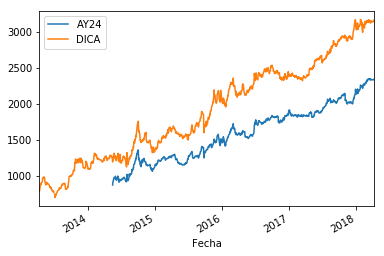

In [16]:
finaldf.index = pd.to_datetime(finaldf.index, format='%d/%m/%Y')
finaldf = finaldf.sort_index()
finaldf['DICA'] = pd.to_numeric(finaldf['DICA'])
finaldf['AY24'] = pd.to_numeric(finaldf['AY24'])
finaldf.plot()

In [8]:
analisis1 = ['GGAL', 'BMA', 'FRAN', 'CRES', 'IRSA', 'LEDE', 'JMIN', 'CTIO', 'ALUA', 'ERAR', 'MIRG', 'YPFD', 'TS', 'PAMP', 'PESA', 'TRAN', 'EDN']
finaldf = finaldf[analisis1]

In [9]:
finaldf.index = pd.to_datetime(finaldf.index,format='%d/%m/%Y')

In [10]:
#finaldf = pd.to_numeric(finaldf)
#finaldf['CUAP'].dropna().pct_change().hist(bins=50)
for name in analisis1:
    finaldf[name] = pd.to_numeric(finaldf[name])

/home/lbiedma/.envs/invertio_solver/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [11]:
finaldf = finaldf.sort_index()

In [35]:
finaldf = finaldf.fillna(method='ffill')

In [41]:
finaldf = finaldf.fillna(method='bfill')

consensus score: 41.808


array([0, 0, 0, 4, 4, 2, 5, 1, 2, 2, 3, 6, 4, 0, 6, 0, 0], dtype=int32)

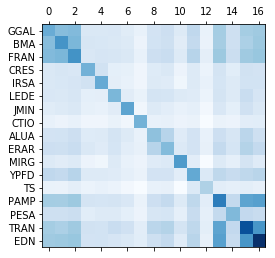

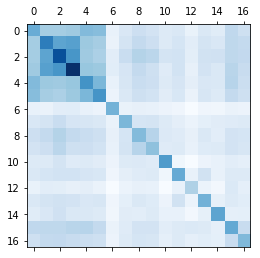

In [211]:
from sklearn.cluster.bicluster import SpectralCoclustering
from sklearn.metrics import consensus_score
data = np.array(finaldf.pct_change().cov())
plt.matshow(data, cmap=plt.cm.Blues)
plt.yticks(range(len(analisis1)), analisis1)
model = SpectralCoclustering(n_clusters=7, random_state=0)
model.fit(data)
score = consensus_score(model.biclusters_,
                        (np.arange(17), np.arange(17)))

print("consensus score: {:.3f}".format(score))

fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
model.column_labels_

In [213]:
listita = ['','','','','','','']
for ind, nro in enumerate(analisis1):
    listita[model.column_labels_[ind]] += nro + ','
listita

['GGAL,BMA,FRAN,PAMP,TRAN,EDN,',
 'CTIO,',
 'LEDE,ALUA,ERAR,',
 'MIRG,',
 'CRES,IRSA,TS,',
 'JMIN,',
 'YPFD,PESA,']

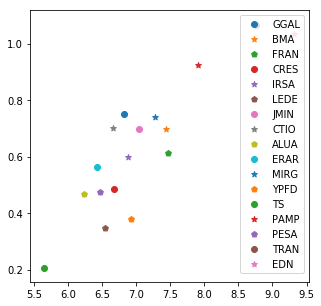

In [255]:
markers = 'o*p'
medias = finaldf.pct_change().mean()
stds = finaldf.pct_change().std()
plt.figure(figsize=(5,5))
num_acciones = len(medias)
colors = np.random.rand(num_acciones)

for i in np.arange(17):
    plt.scatter(stds[i]*252, medias[i]*252, label = analisis1[i], marker=markers[i%3])

plt.legend()

In [170]:
finaldf.tail()

,GGAL,BMA,FRAN,CRES,IRSA,LEDE,JMIN,CTIO,ALUA,ERAR,MIRG,YPFD,TS,PAMP,PESA,TRAN,EDN
Fecha,,,,,,,,,,,,,,,,,
2017-12-01,100.05,176.95,119.25,37.55,51.15,17.45,64.15,52.50,13.25,13.20,504.40,396.20,254.90,44.00,21.85,45.85,38.00
2017-12-04,101.30,180.60,120.00,36.65,50.70,16.85,62.75,51.95,12.95,12.95,494.50,397.30,260.90,43.20,21.50,45.60,37.45
2017-12-05,101.75,182.60,121.85,35.60,49.50,16.40,61.45,50.75,12.70,12.85,483.65,383.65,255.75,42.75,21.50,44.00,37.75
2017-12-06,102.70,196.00,124.25,35.55,50.30,16.25,60.60,51.15,12.70,12.50,479.75,387.45,250.50,43.70,21.80,43.30,38.35
2017-12-07,106.45,199.00,126.10,35.85,50.35,16.25,63.70,50.90,13.20,12.95,480.20,384.65,253.35,44.30,21.65,44.80,40.50


In [ ]:
#seleccion = finaldf[pd.to_datetime('2017-01-01').date():][['DICA','DICY','PARA','PARY','DICP','CUAP','PMD18','CO26','NDG21','PUO19']].pct_change()
seleccion = finaldf[['DICA','DICY','PARA','PARY','DICP','CUAP','PMD18','CO26','NDG21','PUO19', 'AA37', 'AA46', 'I20D7', 'I21M8']].pct_change()

In [ ]:
list(seleccion.std())

In [ ]:
correlaciones

In [ ]:
pesos = np.array([0.07,0.28, 0.06, 0.06,0.14,0.2,0.19])
sum(pesos)

In [ ]:
pesos.dot(correlaciones.dot(pesos))

In [ ]:
pesos.dot(covarianzas.dot(pesos))

In [ ]:
seleccion.multiply(pesos).corr()

In [ ]:
unos = np.ones(7)
unos

In [ ]:
pesos.dot(np.array(seleccion.multiply(pesos).corr()).dot(pesos))

In [ ]:
returns = finaldf[['I20D7', 'I17E8', 'I21F8', 'I21M8', 'I18A8', 'I16Y8', 'I21J8']].pct_change()

In [ ]:
def value_at_risk(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    returns = returns.fillna(0.0)
    # Multiply asset returns by weights to get one weighted portfolio return
    portfolio_returns = returns[-lookback_days:].dot(weights)
    # Compute the correct percentile loss and multiply by value invested
    return np.percentile(portfolio_returns, 100 * (1-alpha)) * value_invested

In [ ]:
def cvar(value_invested, returns, weights, alpha=0.95, lookback_days=520):
    # Call out to our existing function
    var = value_at_risk(value_invested, returns, weights, alpha, lookback_days=lookback_days)
    returns = returns.fillna(0.0)
    portfolio_returns = returns[-lookback_days:].dot(weights)
    
    # Get back to a return rather than an absolute loss
    var_pct_loss = var / value_invested
    
    return value_invested * np.nanmean(portfolio_returns[portfolio_returns < var_pct_loss])

In [ ]:
value_invested = 100
weights = np.array([0.35, 0.7, 0.7, 0.7, 0.15, 0.13, 0.16]) #np.ones((5,1))/5.0
rets = pd.DataFrame(seleccion[['PARA', 'DICA', 'DICP', 'CUAP', 'PMD18', 'I20D7', 'I21M8']])
cvar(value_invested, rets, weights, lookback_days=200)

In [ ]:
seleccion.columns

In [ ]:
weights = np.array([0.4, 0.2, 0.1, 0.3])
rets = pd.DataFrame(seleccion[['PARA', 'PMD18', 'DICP', 'I20D7']])
N = 290
VaRs = np.zeros((N, 1))
for i in range(N):
    VaRs[i] = cvar(value_invested, rets, weights, alpha = 0.99, lookback_days=i)

plt.plot(VaRs)
plt.xlabel('Lookback Window')
plt.ylabel('VaR')
plt.ylim([-10, 2]);